# Model training

## Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, Model


In [2]:
outdir = "out_p_a1_given_q_xeff"
# import data
data = pd.read_pickle(f"{outdir}/p_a1_given_q_xeff.pkl")

In [3]:
data

,q,xeff,a1,p_a1
0,0.0,-1.0,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,0.0,-0.8,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,0.0,-0.6,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,0.0,-0.4,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,0.0,-0.2,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...
116,1.0,0.2,"[0.0, 0.002004008016032064, 0.0040080160320641...","[1.0680033419862862, 1.0678605941877117, 1.067..."
117,1.0,0.4,"[0.0, 0.002004008016032064, 0.0040080160320641...","[0.7832345001188603, 0.7843442342552497, 0.784..."
118,1.0,0.6,"[0.2064128256513026, 0.2080031807101176, 0.209...","[0.0003581317510958827, 0.0006423405154926148,..."
119,1.0,0.8,"[0.6112224448897795, 0.6120015582266737, 0.612...","[0.003378646421929789, 0.004692188317429458, 0..."


## Pre-processing

### Some data contains nans, drop them so that they wont cause problems later

In [4]:
data.drop([0,1,2,3,4,5,6,7,8,9,10,11,21,22,32,33,43,44,54,55,65,66,76,77,87,88,98,99,109,110,120], inplace=True)

In [5]:
data.reset_index(drop=True, inplace=True)

Stupid way of getting everything to a numpy array with dtyoe = float64

In [6]:
a1 = []
for i in range(len(data)):
    a1.append(data['a1'][i])
a1 = np.array(a1)
p = []
for i in range(len(data)):
    p.append(data['p_a1'][i])
p = np.array(p)
q = data['q'].values
xeff = data['xeff'].values

In [7]:
# from sklearn.preprocessing import normalize
# p_norm = normalize(p,axis=0)

### Spliting data into train and test

In [8]:
# split into train and test
from sklearn.model_selection import train_test_split
train_q, test_q, train_xeff, test_xeff, train_p, test_p, train_a1, test_a1 \
= train_test_split(q, xeff, p, a1,
 test_size=0.2, random_state=42)

In [9]:
train_q1 = train_q[8]
train_xeff1 = train_xeff[8]
train_p1 = train_p[8]
train_a11 = train_a1[8]

### Pair q and xeff

In [16]:
train_q_xeff = np.array([train_q1, train_xeff1])

In [18]:
train_q_xeff

array([ 0.8, -0.2])

In [19]:
train_a11

array([0.        , 0.00200401, 0.00400802, 0.00601202, 0.00801603,
       0.01002004, 0.01202405, 0.01402806, 0.01603206, 0.01803607,
       0.02004008, 0.02204409, 0.0240481 , 0.0260521 , 0.02805611,
       0.03006012, 0.03206413, 0.03406814, 0.03607214, 0.03807615,
       0.04008016, 0.04208417, 0.04408818, 0.04609218, 0.04809619,
       0.0501002 , 0.05210421, 0.05410822, 0.05611222, 0.05811623,
       0.06012024, 0.06212425, 0.06412826, 0.06613226, 0.06813627,
       0.07014028, 0.07214429, 0.0741483 , 0.0761523 , 0.07815631,
       0.08016032, 0.08216433, 0.08416834, 0.08617234, 0.08817635,
       0.09018036, 0.09218437, 0.09418838, 0.09619238, 0.09819639,
       0.1002004 , 0.10220441, 0.10420842, 0.10621242, 0.10821643,
       0.11022044, 0.11222445, 0.11422846, 0.11623246, 0.11823647,
       0.12024048, 0.12224449, 0.1242485 , 0.12625251, 0.12825651,
       0.13026052, 0.13226453, 0.13426854, 0.13627255, 0.13827655,
       0.14028056, 0.14228457, 0.14428858, 0.14629259, 0.14829

In [20]:
train_p1

array([1.08673651, 1.08645908, 1.08665725, 1.08634019, 1.08590422,
       1.08530973, 1.0851512 , 1.08546826, 1.0851512 , 1.08487376,
       1.08499266, 1.08530973, 1.08487376, 1.0846756 , 1.08435854,
       1.08392257, 1.08364514, 1.08340734, 1.08269395, 1.08301101,
       1.08328845, 1.08328845, 1.08316955, 1.08324881, 1.08348661,
       1.08336771, 1.08332808, 1.08352624, 1.08384331, 1.08316955,
       1.08360551, 1.08309028, 1.08324881, 1.08356588, 1.08340734,
       1.08289212, 1.08265432, 1.08305065, 1.08285248, 1.08293175,
       1.08316955, 1.08285248, 1.08316955, 1.08309028, 1.08316955,
       1.08360551, 1.08400184, 1.08376404, 1.08352624, 1.08360551,
       1.08400184, 1.0844378 , 1.08416037, 1.08435854, 1.0844378 ,
       1.08439817, 1.08439817, 1.08435854, 1.08423964, 1.08392257,
       1.08388294, 1.0840811 , 1.08376404, 1.08356588, 1.08376404,
       1.08372441, 1.08396221, 1.08388294, 1.08372441, 1.08368477,
       1.08320918, 1.08316955, 1.08356588, 1.08376404, 1.08396

In [29]:
train_a11.shape

(500,)

In [13]:
a11 = []
for i in train_a11:
    a11.append(i)

In [14]:
a11 = np.array(a11)

In [16]:
p1 = []
for i in train_p1:
    p1.append(i)
p1 = np.array(p1)

## Define model

In [10]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
# Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=500) # a1
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(100, activation='relu')(Input2) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(Input2, output)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 100)               50100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 500)               50500     
                                                                 
Total params: 101,000
Trainable params: 100,800
Non-trainable params: 200
_____________________________________________________

In [17]:
opt = keras.optimizers.SGD(learning_rate = 0.1)
model.compile(optimizer= opt,
                loss=tf.keras.losses.MeanSquaredError(),
                metrics= ['accuracy'])

history = model.fit(a11, p1,
                    epochs=500, batch_size=8, verbose=2)

Epoch 1/500


ValueError: in user code:

    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "model" (type Functional).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=True
      • mask=None


1/1 [==============================] - 0s 15ms/step - loss: 0.4817 - accuracy: 0.0000e+00


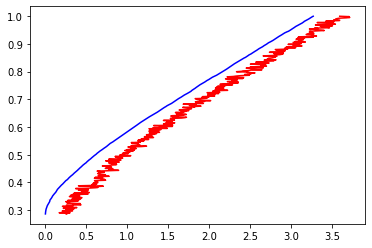

In [12]:
# evaluate model
test_q_xeff = np.stack((test_q, test_xeff), axis=1)
test_p_eval = model.evaluate([test_q_xeff, test_a1], test_p)
test_p_pred = model.predict([test_q_xeff, test_a1])
plt.plot(test_p_pred[3],test_a1[3],label = 'pred',color = 'red')
plt.plot(test_p[3],test_a1[3],label = 'true',color = 'blue')

Text(0, 0.5, 'loss')

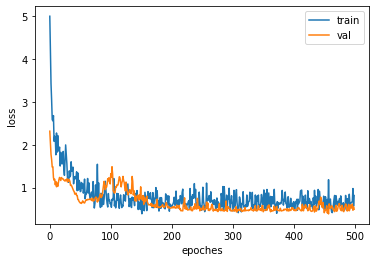

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

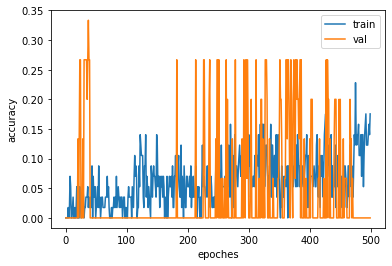

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('accuracy')

In [51]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)

In [52]:
opt = keras.optimizers.SGD(learning_rate = 1)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=8, shuffle=True, verbose=2)

Epoch 1/500
8/8 - 0s - loss: 3.8439 - accuracy: 0.0526 - val_loss: 29.0746 - val_accuracy: 0.0000e+00 - 477ms/epoch - 60ms/step
Epoch 2/500
8/8 - 0s - loss: 1.8347 - accuracy: 0.0526 - val_loss: 50.4858 - val_accuracy: 0.0000e+00 - 28ms/epoch - 3ms/step
Epoch 3/500
8/8 - 0s - loss: 1.9090 - accuracy: 0.0175 - val_loss: 116.6289 - val_accuracy: 0.0667 - 42ms/epoch - 5ms/step
Epoch 4/500
8/8 - 0s - loss: 1.1401 - accuracy: 0.0175 - val_loss: 34.5742 - val_accuracy: 0.0000e+00 - 33ms/epoch - 4ms/step
Epoch 5/500
8/8 - 0s - loss: 1.1912 - accuracy: 0.0175 - val_loss: 48.8449 - val_accuracy: 0.0667 - 36ms/epoch - 5ms/step
Epoch 6/500
8/8 - 0s - loss: 1.4087 - accuracy: 0.0000e+00 - val_loss: 16.3720 - val_accuracy: 0.0667 - 34ms/epoch - 4ms/step
Epoch 7/500
8/8 - 0s - loss: 1.1322 - accuracy: 0.0175 - val_loss: 14.3741 - val_accuracy: 0.0667 - 37ms/epoch - 5ms/step
Epoch 8/500
8/8 - 0s - loss: 0.9078 - accuracy: 0.0000e+00 - val_loss: 13.6222 - val_accuracy: 0.0667 - 37ms/epoch - 5ms/step
E

1/1 [==============================] - 0s 16ms/step - loss: 0.5777 - accuracy: 0.4444


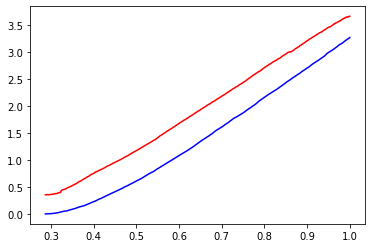

In [53]:
test_p_eval = model.evaluate([test_q_xeff, test_a1], test_p)
test_p_pred = model.predict([test_q_xeff, test_a1])
plt.plot(test_a1[3],test_p_pred[3],label = 'pred',color = 'red')
plt.plot(test_a1[3],test_p[3],label = 'true',color = 'blue')

In [75]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)
opt = keras.optimizers.SGD(learning_rate = 1)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=25, shuffle=True, verbose=2)

Epoch 1/500
3/3 - 0s - loss: 5.0130 - accuracy: 0.0000e+00 - val_loss: 1.8393 - val_accuracy: 0.0000e+00 - 472ms/epoch - 157ms/step
Epoch 2/500
3/3 - 0s - loss: 3.7744 - accuracy: 0.0000e+00 - val_loss: 5.3447 - val_accuracy: 0.0000e+00 - 22ms/epoch - 7ms/step
Epoch 3/500
3/3 - 0s - loss: 2.2781 - accuracy: 0.0000e+00 - val_loss: 27.5112 - val_accuracy: 0.0000e+00 - 23ms/epoch - 8ms/step
Epoch 4/500
3/3 - 0s - loss: 1.6076 - accuracy: 0.0175 - val_loss: 30.1804 - val_accuracy: 0.0667 - 25ms/epoch - 8ms/step
Epoch 5/500
3/3 - 0s - loss: 1.5357 - accuracy: 0.0000e+00 - val_loss: 31.4246 - val_accuracy: 0.0667 - 24ms/epoch - 8ms/step
Epoch 6/500
3/3 - 0s - loss: 1.2722 - accuracy: 0.0175 - val_loss: 30.9961 - val_accuracy: 0.0667 - 24ms/epoch - 8ms/step
Epoch 7/500
3/3 - 0s - loss: 1.1725 - accuracy: 0.0175 - val_loss: 31.4787 - val_accuracy: 0.0000e+00 - 28ms/epoch - 9ms/step
Epoch 8/500
3/3 - 0s - loss: 1.4410 - accuracy: 0.0175 - val_loss: 28.0856 - val_accuracy: 0.0000e+00 - 25ms/epoc

Text(0, 0.5, 'loss')

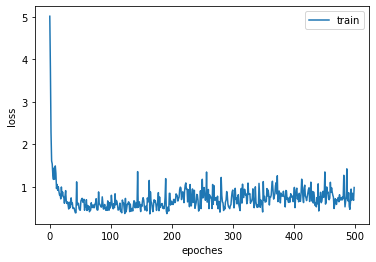

In [76]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

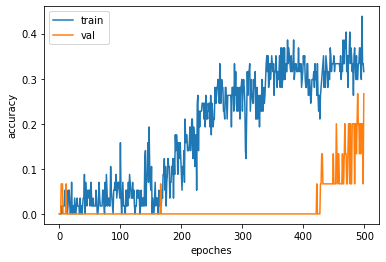

In [77]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('accuracy')

In [98]:
test_q_xeff[3]

array([0.8, 0.6])

1/1 [==============================] - 0s 19ms/step - loss: 0.7246 - accuracy: 0.5556


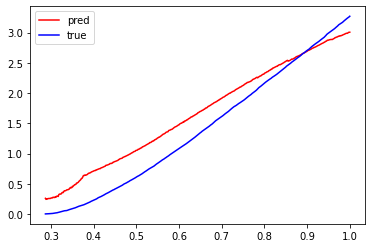

In [80]:
test_p_eval = model.evaluate([test_q_xeff, test_a1], test_p)
test_p_pred = model.predict([test_q_xeff, test_a1])
plt.plot(test_a1[3],test_p_pred[3],label = 'pred',color = 'red')
plt.plot(test_a1[3],test_p[3],label = 'true',color = 'blue')
plt.legend()

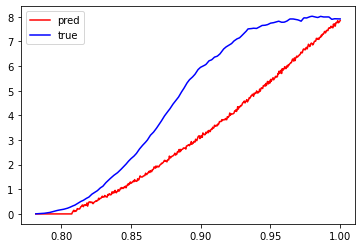

In [81]:
plt.plot(test_a1[4],test_p_pred[4],label = 'pred',color = 'red')
plt.plot(test_a1[4],test_p[4],label = 'true',color = 'blue')
plt.legend()

In [89]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) 

model = Model(inputs=[Input1,Input2], outputs=output)
opt = keras.optimizers.SGD(learning_rate = 1.5)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=25, shuffle=True, verbose=2)

Epoch 1/500
3/3 - 0s - loss: 4.6985 - accuracy: 0.0000e+00 - val_loss: 80.6265 - val_accuracy: 0.0000e+00 - 462ms/epoch - 154ms/step
Epoch 2/500
3/3 - 0s - loss: 2.6185 - accuracy: 0.0000e+00 - val_loss: 94.6376 - val_accuracy: 0.0000e+00 - 23ms/epoch - 8ms/step
Epoch 3/500
3/3 - 0s - loss: 1.9139 - accuracy: 0.0000e+00 - val_loss: 132.1166 - val_accuracy: 0.0000e+00 - 23ms/epoch - 8ms/step
Epoch 4/500
3/3 - 0s - loss: 1.2323 - accuracy: 0.0351 - val_loss: 86.0121 - val_accuracy: 0.0000e+00 - 26ms/epoch - 9ms/step
Epoch 5/500
3/3 - 0s - loss: 1.2901 - accuracy: 0.0175 - val_loss: 94.6911 - val_accuracy: 0.0000e+00 - 25ms/epoch - 8ms/step
Epoch 6/500
3/3 - 0s - loss: 0.9593 - accuracy: 0.0526 - val_loss: 66.0547 - val_accuracy: 0.0000e+00 - 24ms/epoch - 8ms/step
Epoch 7/500
3/3 - 0s - loss: 1.2035 - accuracy: 0.0175 - val_loss: 44.9650 - val_accuracy: 0.0000e+00 - 27ms/epoch - 9ms/step
Epoch 8/500
3/3 - 0s - loss: 1.3770 - accuracy: 0.0526 - val_loss: 52.2112 - val_accuracy: 0.0000e+00 

Text(0, 0.5, 'accuracy')

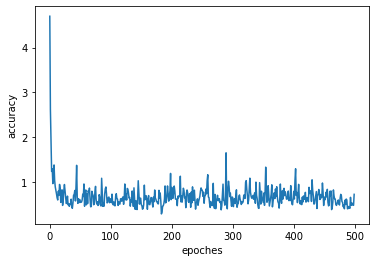

In [94]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
#plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

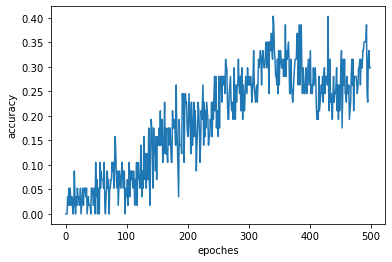

In [91]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('accuracy')

1/1 [==============================] - 0s 20ms/step - loss: 2.6287 - accuracy: 0.6111


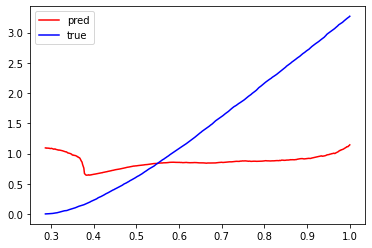

In [93]:
test_p_eval = model.evaluate([test_q_xeff, test_a1], test_p)
test_p_pred = model.predict([test_q_xeff, test_a1])
plt.plot(test_a1[3],test_p_pred[3],label = 'pred',color = 'red')
plt.plot(test_a1[3],test_p[3],label = 'true',color = 'blue')
plt.legend()

Epoch 1/500
3/3 - 0s - loss: 3684.2554 - accuracy: 0.0000e+00 - val_loss: 9277154.0000 - val_accuracy: 0.0000e+00 - 491ms/epoch - 164ms/step
Epoch 2/500
3/3 - 0s - loss: 3933.5774 - accuracy: 0.0351 - val_loss: 355.6643 - val_accuracy: 0.0000e+00 - 22ms/epoch - 7ms/step
Epoch 3/500
3/3 - 0s - loss: 5.9139 - accuracy: 0.1228 - val_loss: 2.9873 - val_accuracy: 0.0000e+00 - 25ms/epoch - 8ms/step
Epoch 4/500
3/3 - 0s - loss: 5.9139 - accuracy: 0.1228 - val_loss: 2.9873 - val_accuracy: 0.0000e+00 - 25ms/epoch - 8ms/step
Epoch 5/500
3/3 - 0s - loss: 5.9139 - accuracy: 0.1228 - val_loss: 2.9873 - val_accuracy: 0.0000e+00 - 24ms/epoch - 8ms/step
Epoch 6/500
3/3 - 0s - loss: 5.9139 - accuracy: 0.1228 - val_loss: 2.9873 - val_accuracy: 0.0000e+00 - 23ms/epoch - 8ms/step
Epoch 7/500
3/3 - 0s - loss: 5.9139 - accuracy: 0.1228 - val_loss: 2.9873 - val_accuracy: 0.0000e+00 - 25ms/epoch - 8ms/step
Epoch 8/500
3/3 - 0s - loss: 5.9139 - accuracy: 0.1228 - val_loss: 2.9873 - val_accuracy: 0.0000e+00 - 2

Text(0, 0.5, 'accuracy')

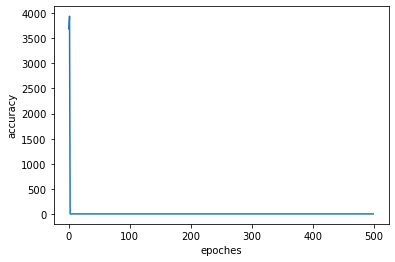

In [97]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # Merging Laryer
# x = keras.layers.Dense(1024, activation='relu')(merged)
# x = keras.layers.Dropout(0.1)(x)
# x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(merged) # Fully Connected Layer
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.BatchNormalization()(x)
output = keras.layers.Dense(500, activation='relu')(x) # Fully Connected Layer

model = Model(inputs=[Input1,Input2], outputs=output)
opt = keras.optimizers.SGD(learning_rate = 1.5)
model.compile(optimizer= opt,
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, validation_split=0.2,
                    epochs=500, batch_size=25, shuffle=True, verbose=2)

plt.plot(history.history['loss'])
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.legend(['train', 'val'])
plt.xlabel('epoches')
plt.ylabel('accuracy')


